# [Lecture 21 In-Class Exercise](https://computing-in-context.afeld.me/lecture_21.html#in-class-exercise) Solution


[Fix rendering:](https://computing-in-context.afeld.me/notebooks.html#jupyter-book)


In [8]:
import plotly.io as pio

pio.renderers.default = "notebook_connected+plotly_mimetype"

## Download data

[More about the URL below.](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures)


In [12]:
!mkdir -p data
!wget -O data/electricity.zip -nc "https://api.worldbank.org/v2/country/all/indicator/EG.ELC.ACCS.ZS?source=2&date=2002:2022&downloadformat=csv"

--2025-11-18 14:03:26--  https://api.worldbank.org/v2/country/all/indicator/EG.ELC.ACCS.ZS?source=2&date=2002:2022&downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 172.64.145.25, 104.18.42.231
Connecting to api.worldbank.org (api.worldbank.org)|172.64.145.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28060 (27K) [application/zip]
Saving to: ‘data/electricity.zip’

data/electricity.zi 100%[===================>]  27.40K  --.-KB/s    in 0.001s  

2025-11-18 14:03:27 (28.0 MB/s) - ‘data/electricity.zip’ saved [28060/28060]



In [13]:
!rm -rf data/electricity
!unzip data/electricity.zip -d data/electricity

Archive:  data/electricity.zip
  inflating: data/electricity/Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_EN_csv_v2_225978.csv  
  inflating: data/electricity/API_EG.ELC.ACCS.ZS_DS2_EN_csv_v2_225978.csv  
  inflating: data/electricity/Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_EN_csv_v2_225978.csv  


## Load data


In [14]:
import pandas as pd

electricity = pd.read_csv("Electricity Generation.csv", header=2)
electricity

,3304.000
0,3351.000
1,3366.000
2,3281.000
3,3266.000
4,3196.000
...,...
2982,4367.540
2983,4200.575
2984,4367.601
2985,4411.653


## [Reshape](https://pandas.pydata.org/docs/user_guide/reshaping.html#melt-and-wide-to-long)


In [15]:
electricity_by_country_by_year = (
    electricity.drop(columns=["Indicator Name", "Indicator Code"])
    .melt(
        id_vars=["Country Name", "Country Code"],
        var_name="Year",
        value_name="Access to electricity (% of population)",
    )
    .dropna()
)

electricity_by_country_by_year

KeyError: "['Indicator Name', 'Indicator Code'] not found in axis"

## Plot


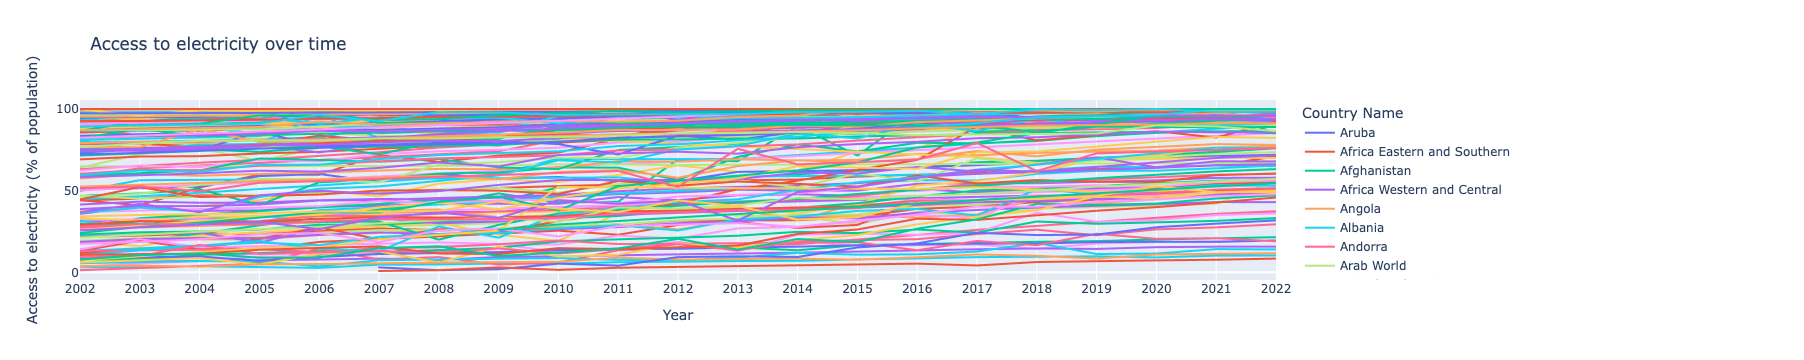

In [6]:
import plotly.express as px

fig = px.line(
    electricity_by_country_by_year,
    x="Year",
    y="Access to electricity (% of population)",
    color="Country Name",
    title="Access to electricity over time",
)
fig.show()

Plotly showing that many values on an axis (the `Year` in this case) indicates that it's a string.


## Fix year dtype


In [9]:
electricity_by_country_by_year.dtypes

NameError: name 'electricity_by_country_by_year' is not defined

In [8]:
electricity_by_country_by_year["Year"] = electricity_by_country_by_year["Year"].astype(int)

## Filter


In [9]:
avg_electricity = electricity_by_country_by_year.groupby("Country Name")["Access to electricity (% of population)"].mean()
avg_electricity

Country Name
Afghanistan                    61.876190
Africa Eastern and Southern    32.881725
Africa Western and Central     45.452160
Albania                        99.757143
Algeria                        99.142857
                                 ...    
West Bank and Gaza             99.742857
World                          85.250561
Yemen, Rep.                    63.404762
Zambia                         30.523810
Zimbabwe                       40.633333
Name: Access to electricity (% of population), Length: 263, dtype: float64

In [10]:
bottom_cutoff = avg_electricity.quantile(0.05)
bottom_cutoff

np.float64(21.837142857142858)

In [11]:
bottom_countries = avg_electricity[avg_electricity < bottom_cutoff]
bottom_countries

Country Name
Burkina Faso                14.676190
Burundi                      6.547619
Central African Republic    10.990476
Chad                         7.566667
Congo, Dem. Rep.            14.438095
Guinea-Bissau               16.771429
Liberia                     14.768750
Madagascar                  21.823810
Malawi                       9.547619
Mozambique                  20.528571
Niger                       14.133333
Papua New Guinea            16.957143
Sierra Leone                17.604762
South Sudan                  4.475000
Name: Access to electricity (% of population), dtype: float64

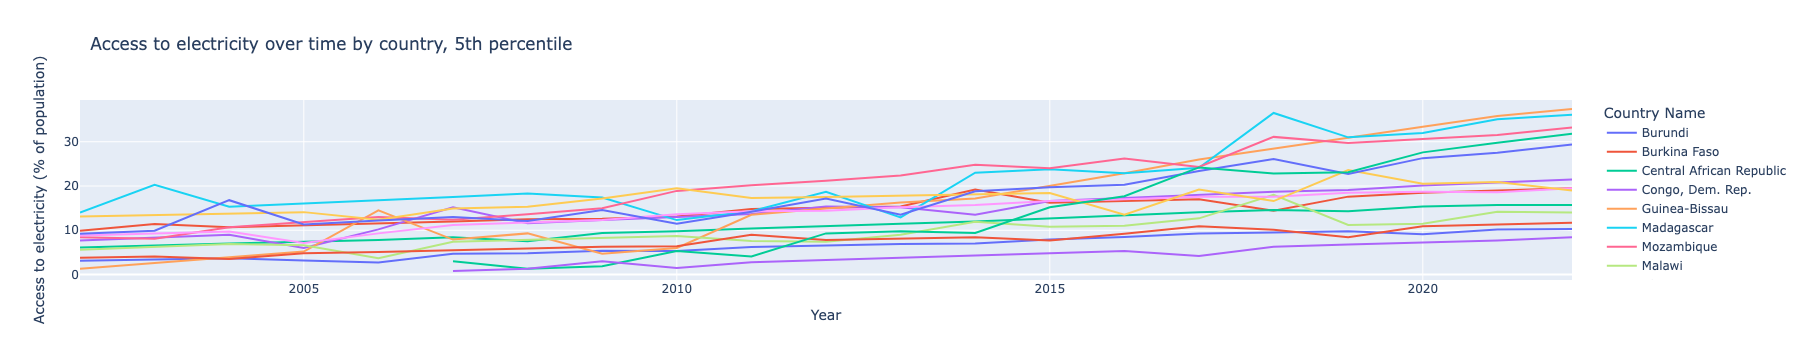

In [12]:
bottom_countries_electricity = electricity_by_country_by_year[electricity_by_country_by_year["Country Name"].isin(bottom_countries.index)]

fig = px.line(
    bottom_countries_electricity,
    x="Year",
    y="Access to electricity (% of population)",
    color="Country Name",
    title="Access to electricity over time by country, 5th percentile",
)
fig.show()

## [World Happiness Report data](https://www.worldhappiness.report/data-sharing/)

[Requires `openpyxl` package.](https://pandas.pydata.org/docs/user_guide/io.html#excel-files) [How to install.](https://computing-in-context.afeld.me/notebooks.html#installing-packages)


In [13]:
happiness = pd.read_excel("https://files.worldhappiness.report/WHR25_Data_Figure_2.1v3.xlsx")
happiness

,Year,Rank,Country name,Life evaluation (3-year average),Lower whisker,Upper whisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,147,Afghanistan,1.364,1.301,1.427,0.649,0.0,0.155,0.0,0.075,0.135,0.348
1,2023,143,Afghanistan,1.721,1.667,1.775,0.628,0.0,0.242,0.0,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.795,1.923,0.645,0.0,0.087,0.0,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.339,2.469,0.758,0.0,0.289,0.0,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.449,2.596,0.370,0.0,0.126,0.0,0.122,0.010,1.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016,138,Zimbabwe,3.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,2015,131,Zimbabwe,4.193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,2014,115,Zimbabwe,4.610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,2012,103,Zimbabwe,4.827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


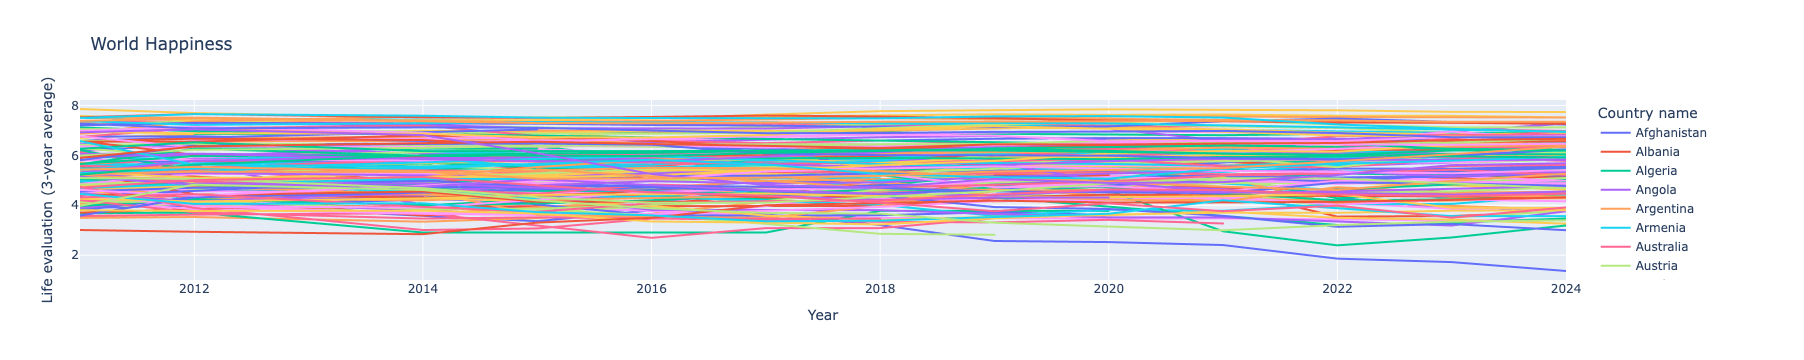

In [14]:
fig = px.line(happiness, x="Year", y="Life evaluation (3-year average)", color="Country name", title="World Happiness")
fig = fig.show()

In [15]:
happiness.dtypes

Year                                            int64
Rank                                            int64
Country name                                   object
Life evaluation (3-year average)              float64
Lower whisker                                 float64
Upper whisker                                 float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
dtype: object

## Single country


In [16]:
country_name = "Madagascar"

madagascar_electricity = electricity_by_country_by_year[electricity_by_country_by_year["Country Name"] == country_name]
madagascar_electricity

,Country Name,Country Code,Year,Access to electricity (% of population)
151,Madagascar,MDG,2002,14.0
417,Madagascar,MDG,2003,20.3
683,Madagascar,MDG,2004,15.3
949,Madagascar,MDG,2005,16.0
1215,Madagascar,MDG,2006,16.8
1481,Madagascar,MDG,2007,17.5
1747,Madagascar,MDG,2008,18.3
2013,Madagascar,MDG,2009,17.4
2279,Madagascar,MDG,2010,12.3
2545,Madagascar,MDG,2011,14.3


In [17]:
madagascar_happiness = happiness[happiness["Country name"] == country_name]
madagascar_happiness

,Year,Rank,Country name,Life evaluation (3-year average),Lower whisker,Upper whisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
1041,2024,130,Madagascar,4.1570,4.050000,4.265000,0.588000,0.938000,0.341000,0.292000,0.13100,0.118000,1.751000
1042,2023,123,Madagascar,4.2280,4.097000,4.359000,0.628000,0.823000,0.333000,0.250000,0.17200,0.123000,1.897000
1043,2022,127,Madagascar,4.0190,3.839000,4.199000,0.632000,0.779000,0.178000,0.187000,0.17700,0.134000,1.932000
1044,2021,128,Madagascar,4.3390,4.148000,4.530000,0.670000,0.645000,0.378000,0.202000,0.14300,0.154000,2.148000
1045,2020,136,Madagascar,4.2080,4.068000,4.349000,0.266000,0.503000,0.341000,0.207000,0.18500,0.087000,2.620000
1046,2019,137,Madagascar,4.1656,4.052817,4.278382,0.244553,0.823694,0.500617,0.192968,0.19119,0.076249,2.136298
1047,2018,143,Madagascar,3.9330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048,2017,143,Madagascar,3.7740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049,2016,144,Madagascar,3.6440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050,2015,148,Madagascar,3.6950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Two Y Axes

Based on [Plotly example](https://plotly.com/python/multiple-axes/#Two-Y-Axes).


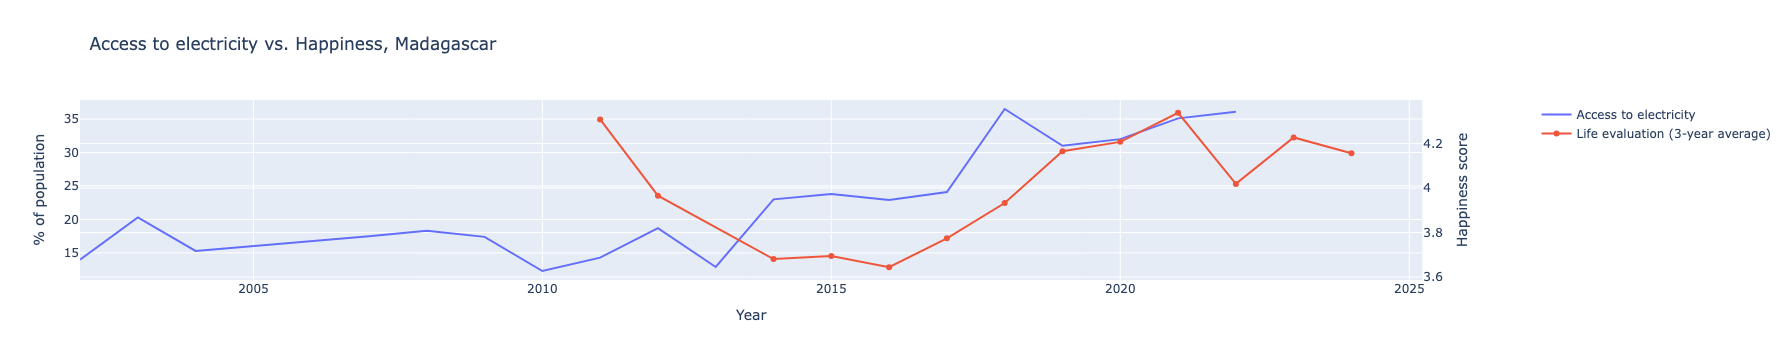

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(
        x=madagascar_electricity["Year"],
        y=madagascar_electricity["Access to electricity (% of population)"],
        name="Access to electricity",
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
        x=madagascar_happiness["Year"],
        y=madagascar_happiness["Life evaluation (3-year average)"],
        name="Life evaluation (3-year average)",
    ),
    secondary_y=True,
)

# Add figure title
fig.update_layout(title_text=f"Access to electricity vs. Happiness, {country_name}")

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="% of population", secondary_y=False)
fig.update_yaxes(title_text="Happiness score", secondary_y=True)

fig.show()